## MULTIPLE LINEAR REGRESSION IMPLEMENTATION ON STARTUPS DATASET

*   Author: Satabdi Mishra
*   Date: 25/07/2021



In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('Startups.csv')
df = dataset.copy()

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Exploratory Data Analysis

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
#Null Check

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

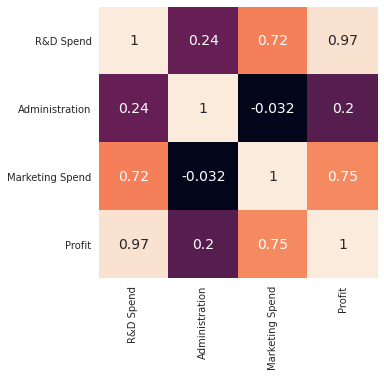

In [6]:
# Correlation Matrix

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()


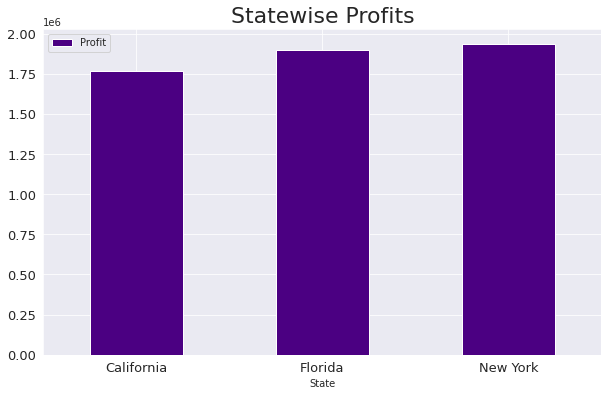

In [7]:
#Plot statewise profits

df[['State','Profit']].groupby(['State']).sum()
statewise_data = df[['State','Profit']].groupby(['State']).sum()

color=['indigo']

ax = statewise_data.plot(kind='bar', figsize=(10,6), color=color, fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Statewise Profits", fontsize=22)
plt.xticks(rotation = 0)
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


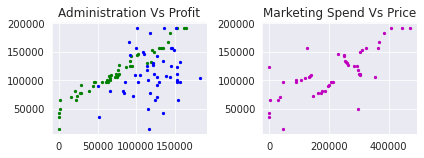

In [8]:
# Plotting the scatter plot of numerical variables

plt.subplot(2,2,1)
plt.title('R&D Spend Vs Profit')
plt.scatter(df['R&D Spend'], df['Profit'], s=5, c='g')

plt.subplot(2,2,1)
plt.title('Administration Vs Profit')
plt.scatter(df['Administration'], df['Profit'], s=5, c='b')

plt.subplot(2,2,2)
plt.title('Marketing Spend Vs Price')
plt.scatter(df['Marketing Spend'], df['Profit'], s=5, c='m')


plt.tight_layout()

In [9]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

Getting Dummies

In [10]:
df['State'] = df['State'].astype('category')
df = pd.get_dummies(df, drop_first=True)

df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [11]:
X = df.copy()
y = X['Profit']
X.drop(columns = ['Profit'], inplace = True)
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [12]:
# Train Test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Model Fitting

In [13]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Predicting test data

Y_predict = std_reg.predict(X_test)

In [15]:
# RMSE Score

from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

rmse

8916.021618650573

In [16]:
# Adjusted R2 on train

ar2 = 1 - (1-std_reg.score(X_train, Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)

ar2

0.9339827989672496

In [17]:
# Adjusted R2 on test

ar2 = 1 - (1-std_reg.score(X_test, Y_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

ar2

0.9211640594634722